## Librerías

In [1]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression,  f_classif, mutual_info_classif, chi2
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import a_funciones as funciones

## Importación de datos

In [2]:
# Manuela 
# Datos del 2015
df_2015 = pd.read_csv("C:\\Users\\Manuela\\Documents\\Analitica 3\\Analitica_3_Proyecto_1\\processed_data_2015.csv", sep =",")
# Datos del 2016
df_2016 = pd.read_csv("C:\\Users\Manuela\\Documents\\Analitica 3\\Analitica_3_Proyecto_1\\processed_data_2016.csv", sep =",")

In [3]:
df_2015['EmployeeID'] = df_2015['EmployeeID'].astype(str)
df_2015['PercentSalaryHike'] = df_2015['PercentSalaryHike'] / 100

## Métodos de Filtrado


### Umbral de Varianza

In [4]:
x_numericos = df_2015.select_dtypes(include = ["number"]) # solo variables númericas
x_numericos.head()

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,renuncia2016
0,51,6,2,131160,1.0,0.11,6,1,0,3.0,4.0,2.0,3,3,0
1,31,10,1,41890,0.0,0.23,3,5,1,3.0,2.0,4.0,2,4,1
2,32,17,4,193280,1.0,0.15,2,5,0,2.0,2.0,1.0,3,3,0
3,38,2,5,83210,3.0,0.11,5,8,7,4.0,4.0,3.0,2,3,0
4,32,10,1,23420,4.0,0.12,2,6,0,4.0,1.0,3.0,3,3,0


In [5]:
del x_numericos['renuncia2016']
x_numericos.describe()

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000
mean,36.929666,9.195915,2.913881,65062.451253,2.692201,0.152136,2.796657,7.027391,2.189183,2.724234,2.725395,2.761606,2.728180,3.154132
std,9.141227,8.095447,1.024321,47042.610566,2.496799,0.036627,1.289873,6.146852,3.231449,1.093322,1.101337,0.707217,0.711232,0.361117
min,18.000000,1.000000,1.000000,10090.000000,0.000000,0.110000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,2.000000,29222.500000,1.000000,0.120000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,49360.000000,2.000000,0.140000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,83810.000000,4.000000,0.180000,3.000000,9.250000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,199990.000000,9.000000,0.250000,6.000000,40.000000,15.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [8]:
# Ejemplo de uso:
df_normalizada = funciones.normalize_dataframe(x_numericos)
df_normalizada

c:\Users\Manuela\Documents\Analitica 3\Analitica_3_Proyecto_1\a_funciones.py:361: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.78571429 0.30952381 0.33333333 ... 0.35714286 0.33333333 0.45238095]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.iloc[:, :] = sv
c:\Users\Manuela\Documents\Analitica 3\Analitica_3_Proyecto_1\a_funciones.py:361: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.17857143 0.32142857 0.57142857 ... 0.         0.78571429 0.03571429]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.iloc[:, :] = sv
c:\Users\Manuela\Documents\Analitica 3\Analitica_3_Proyecto_1\a_funciones.py:361: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.25 0.   0.75 ... 0.5  0.   0.5 ]'

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,0.785714,0.178571,0.25,0.637546,0.111111,0.000000,1.000000,0.025,0.000000,0.666667,1.000000,0.333333,0.666667,0
1,0.309524,0.321429,0.00,0.167457,0.000000,0.857143,0.500000,0.125,0.066667,0.666667,0.333333,1.000000,0.333333,1
2,0.333333,0.571429,0.75,0.964666,0.111111,0.285714,0.333333,0.125,0.000000,0.333333,0.333333,0.000000,0.666667,0
3,0.476190,0.035714,1.00,0.385045,0.333333,0.000000,0.833333,0.200,0.466667,1.000000,1.000000,0.666667,0.333333,0
4,0.333333,0.321429,0.00,0.070195,0.444444,0.071429,0.333333,0.150,0.000000,1.000000,0.000000,0.666667,0.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,0.261905,0.214286,0.00,0.061664,0.111111,0.714286,0.333333,0.100,0.000000,0.666667,1.000000,0.333333,0.666667,1
4304,0.357143,0.357143,0.75,0.322854,0.555556,0.714286,0.333333,0.125,0.000000,0.666667,1.000000,0.000000,0.333333,1
4305,0.357143,0.000000,0.50,0.217904,0.777778,0.000000,0.333333,0.225,0.066667,0.000000,0.000000,1.000000,0.666667,0
4306,0.333333,0.785714,0.00,0.076830,0.000000,0.000000,0.333333,0.075,0.066667,1.000000,0.666667,0.000000,0.666667,0


In [12]:
# Obtener columnas seleccionadas
import math as mt

# Parametros para definir que era constante:
desviacion = 0.21 # eliminar todo cuya desviación estandar sea menor a 0.21, teniendo en cuenta tabla anterior
varianza = desviacion**2

# Resultados
print('Desviación estandar:', mt.sqrt(varianza))
print('Varianza:', varianza)
x_new = funciones.variance_threshold(df_normalizada, varianza)
df_new_int = df_normalizada.iloc[:,x_new] # nuevo dataframe
df_new_int.head()

Desviación estandar: 0.21
Varianza: 0.04409999999999999


,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TrainingTimesLastYear,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,0.785714,0.178571,0.25,0.637546,0.111111,0.000000,1.000000,0.000000,0.666667,1.000000,0.333333,0.666667,0
1,0.309524,0.321429,0.00,0.167457,0.000000,0.857143,0.500000,0.066667,0.666667,0.333333,1.000000,0.333333,1
2,0.333333,0.571429,0.75,0.964666,0.111111,0.285714,0.333333,0.000000,0.333333,0.333333,0.000000,0.666667,0
3,0.476190,0.035714,1.00,0.385045,0.333333,0.000000,0.833333,0.466667,1.000000,1.000000,0.666667,0.333333,0
4,0.333333,0.321429,0.00,0.070195,0.444444,0.071429,0.333333,0.000000,1.000000,0.000000,0.666667,0.666667,0


Selección Univariante

In [15]:
x_num = x_numericos
y = df_2015['renuncia2016']


df_normalizada ya tiene los datos normalizados con minmaxscales, entonces voy a utilizar estos para realizar el resto del código

In [ ]:
# Normalización de datos
x_num_norm = x_num.copy(deep = True)  # copia
scaler = MinMaxScaler() # Se usará minmaxScaler
sv = scaler.fit_transform(x_num_norm.iloc[:,:]) # normalizar los datos
x_num_norm.iloc[:,:] = sv # asignar los nuevos datos
x_num_norm.head()



In [14]:
# Función de filtro de caracteristicas - stadis. scores
def select_kbest(X,y,score_f,k): #se establece una funcion que permite sacar varias funciones de evaluacion
    sel_kb = SelectKBest(score_func=score_f, k=k)
    sel_kb.fit(X,y)
    scores = sel_kb.scores_
    pvalues = sel_kb.pvalues_
    new_cols = sel_kb.get_support()
    print("Scores:\n", scores, "\nP-values:\n", pvalues)

In [20]:
from sklearn.feature_selection import SelectKBest, f_classif

# Definir la función select_kbest correctamente
def select_kbest(X, y, score_func, k):
    selector = SelectKBest(score_func=score_func, k=k)
    X_new = selector.fit_transform(X, y)
    scores = selector.scores_
    pvalues = selector.pvalues_
    return X_new, scores, pvalues, selector

# Suponiendo que df_normalizada y y ya están definidos
x_new, scores, pvalues, selector = select_kbest(df_normalizada, y, f_classif, 3) 

# Crear el nuevo dataframe con las columnas seleccionadas
df_new = pd.DataFrame(x_new, columns=df_normalizada.columns[selector.get_support(indices=True)])
df_new.head()


,Age,YearsAtCompany,JobSatisfaction
0,0.785714,0.025,1.000000
1,0.309524,0.125,0.333333
2,0.333333,0.125,0.333333
3,0.476190,0.200,1.000000
4,0.333333,0.150,0.000000


In [16]:
#F Classif 
x_new, scores, pvalues = select_kbest(df_normalizada, y,  f_classif, 3) # Obtener columnas seleciconadas - (3 caracteristicas)
df_new = x_num.iloc[:,x_new] # Nuevo conjunto de datos
df_new.head() #se escogen los valores p mas pequeños, y las variables tiene relacion con la variable objetivo


Scores:
 [79.42601793  0.09025343  0.83453585  2.59685324  9.35035154  1.24789238
 10.26845972 59.32635739  1.5324434  31.24486158 43.13514057 13.56098676
  0.99518748  0.38555308] 
P-values:
 [7.25428246e-19 7.63869718e-01 3.61015358e-01 1.07149415e-01
 2.24312002e-03 2.64017730e-01 1.36311308e-03 1.64669883e-14
 2.15813596e-01 2.41507387e-08 5.71548047e-11 2.33768206e-04
 3.18533861e-01 5.34679068e-01]


TypeError: cannot unpack non-iterable NoneType object

In [25]:
import matplotlib.pyplot as plt
import numpy as np
def plot(metric, features, name):
    features = features
    fig, ax = plt.subplots(figsize=(10, 6))  # Ajuste el tamaño de la figura según sea necesario
    width = 0.4  # Ancho de las barras
    ax.bar(np.arange(len(metric)), metric, width=width)
    ax.set_xlabel('Features')
    ax.set_ylabel(name)
    ax.set_xticks(np.arange(len(metric)))
    ax.set_xticklabels(features)
    plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor visualización
    plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
    return plt.show()

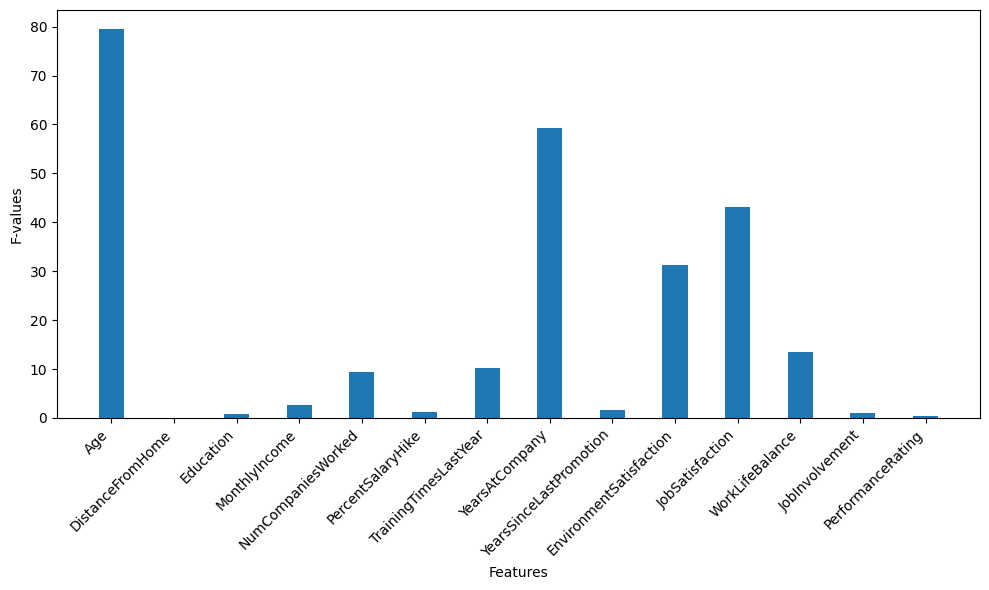

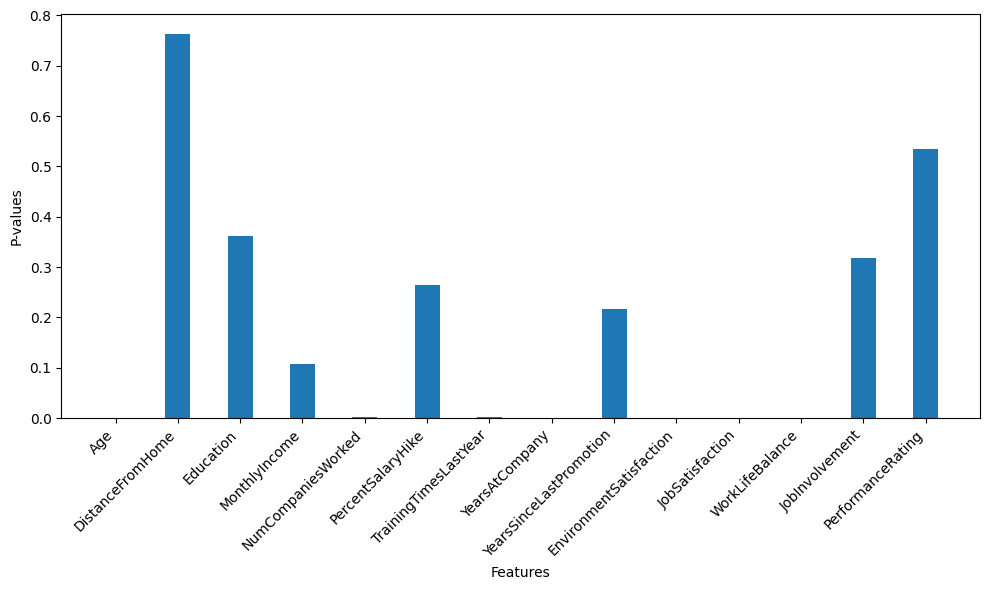

In [26]:
plot(scores, x_num.columns, 'F-values')
plot(pvalues, x_num.columns, 'P-values')

## Métodos Wrapper 

RFE (Recursive Feature Elimination)

In [27]:
# Función recursiva de selección de características
def recursive_feature_selection(X,y,model,k): #model=modelo que me va a servir de estimador en este caso de regresión logística
  rfe = RFE(model, n_features_to_select=k, step=1)# step=1 cada cuanto el toma la sucesión de tomar una caracteristica
  fit = rfe.fit(X, y)
  X_new = fit.support_
  print("Num Features: %s" % (fit.n_features_))
  print("Selected Features: %s" % (fit.support_))
  print("Feature Ranking: %s" % (fit.ranking_))

  return X_new

In [ ]:
#  Estimador en este caso para regresión logística (problema de clasificación)
model = LogisticRegressionCV()

# Obtener columnas seleciconadas - (4 caracteristicas)
X_new = recursive_feature_selection(x_num_norm, y, model, 4)

# Nuevo conjunto de datos
df_new = x_num.iloc[:,X_new]
df_new.head()

## Métodos Integrados 

Regresión Ridge

In [ ]:
# Selector con un modelo de regresión logística
sel_ = SelectFromModel(LogisticRegression(penalty='l2', C=1.0))  # Usamos 'l2' para regularización Ridge

sel_.fit(x_num_norm, y)

# Obtener variables seleccionadas
X_new = sel_.get_support()

df_new = x_num.iloc[:, X_new]
print(df_new.head())